<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/KMeans_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis

Principle component analysis is a data reduction and analysis technique that is especially important in "large, mutidimensional datasets." [1,3] Reducing the dimensionality of the data to *principle component analysis* can help us better understand the patterns in the data by removing the "noise" from variables that do not contribue much to the understanding of the data structure.[2] 

By lowering the number of variables (components) that can exaplain the bigger part of the variance across the dataset, PCA maintains underlying signal in the dataset while allowing us to reduce variables that do not contribute to much of the variance in the dataset. 

Let's explore PCA in the following example using the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

[1] Jinhyun, J., Banfelder, J., & Skrabanek, L. (2017). Quantitative Understanding in Biology Principal Component Analysis. The Rockefeller University. Pág.

[2] Nguyen, L. H., & Holmes, S. (2019). Ten quick tips for effective dimensionality reduction. PLoS Computational Biology, 15(6), e1006907.

[3] Shlens, J. (2014). A Tutorial on Principal Component Analysis. ArXiv:1404.1100 [Cs, Stat]. http://arxiv.org/abs/1404.1100



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

#getting the Iris dartaset from sklearn
#see details here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()


Let's explore the Iris dataset. There's a data portion that includes 4 featuers. 

In [7]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The four features are...

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The target is basically describing three different types of flowers: Iris setosa, Iris virginica and Iris versicolor

In [9]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Since we always like to work with Pandas DataFrames, let's set one up using this dataset

In [10]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Because we want to make the names of the columns easier for us (not to have to add the spaces and the "cm," let's rename our columns...

In [12]:
df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)

In [13]:
#these are the packages we use when plotting figures using Pandas DataFrames in a notebook. 
#check the introduction to Pandas for details (https://github.com/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

Let's create a scatterplot with sepal length on the x-axis and sepal width on the y-axis. Let's color the different types of flowers to make things clearer. Do you see any patterns here? 

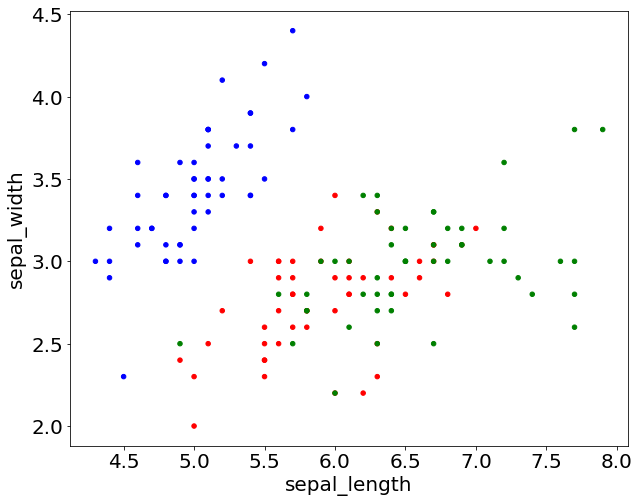

In [14]:
col = df.target.map({0.0:'b', 1.0:'r', 2.0:'g'})
df.plot.scatter(x='sepal_length',y='sepal_width',c=col)

##Enter K-means clustering

OK. Let's try this for the first time, with a K (number of clusters) = 5.

In [48]:
x = df[df.columns[:-1]].values
kmeans5 = KMeans(n_clusters=5)
y_kneas5 = kmeans5.fit(x)
print(y_kneas5.cluster_centers_)

[[6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.006      3.428      1.462      0.246     ]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


In [49]:
k_means_test = y_kneas5.predict(x)
print(k_means_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 0 4 3 0 0 3 2 3 0 3 0
 0 0 4 0 0 0 3 3 4 0 4 3 4 0 3 4 4 0 3 3 3 0 4 4 3 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]


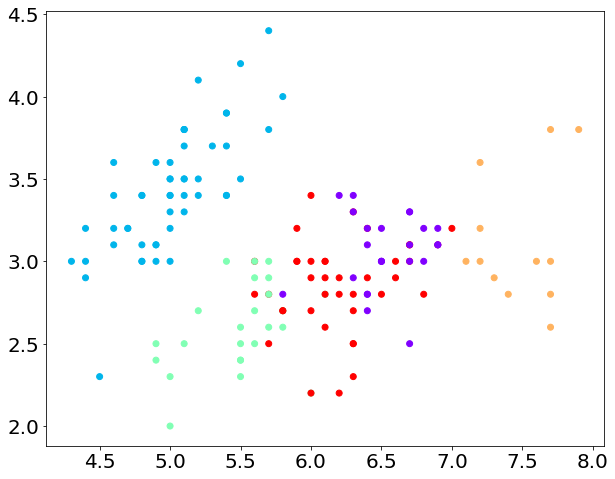

In [50]:
plt.scatter(x[:,0],x[:,1],c=k_means_test, cmap='rainbow')

##Finding the best number of clusters (centroids),K: The Elbow Method

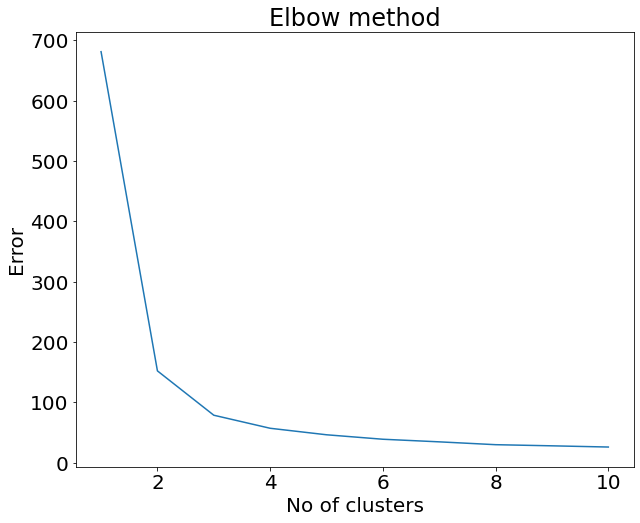

In [30]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    #inertia_float:Sum of squared distances of samples to their closest cluster center
    #remember the explanation of K-means as the average between the points
    #the lower the error, the better
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [38]:
x = df[df.columns[:-1]].values
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit(x)
print(y_kmeans3.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [39]:
k_means_test = y_kmeans3.predict(x)
print(k_means_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


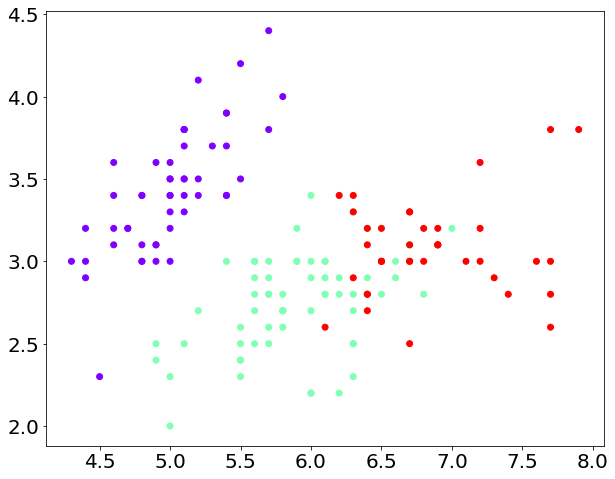

In [47]:
plt.scatter(x[:,0],x[:,1],c=k_means_test, cmap='rainbow')

In [44]:
x[:,0].shape

(150,)

In [45]:
x[:,1].shape

(150,)